In [30]:
pip install spacy


     -------------------------------------- 12.2/12.2 MB 633.9 kB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 996.6 kB/s eta 0:00:00
     ------------------------------------ 480.9/480.9 kB 884.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 918.4 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
import spacy


In [13]:
df = pd.read_csv('data.csv')
print(df.shape)
df = df.head(30)
print(df.shape)

(255, 3)
(30, 3)


In [14]:
df.head()

,Product Name,Review,Rating
0,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",The laptop's screen is huge and great picture ...,5
1,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",Great product,5
2,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",See review title.,4
3,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",The laptop works great so far. It wasn't easy ...,5
4,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Si me sgradoy,4


In [15]:
df['Rating']

0     5
1     5
2     4
3     5
4     4
5     5
6     5
7     5
8     5
9     1
10    5
11    4
12    4
13    5
14    5
15    5
16    3
17    5
18    5
19    4
20    5
21    4
22    5
23    5
24    5
25    5
26    5
27    2
28    3
29    5
Name: Rating, dtype: int64

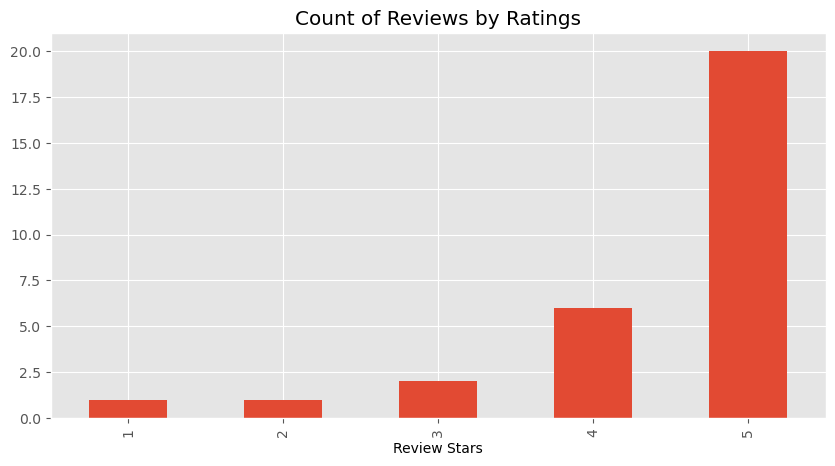

In [17]:
ax = df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Ratings',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [19]:
#Basic NLTK
#5 IS iNDEX
example = df['Review'][5]
print(example)

It’s a great laptop, fast and easy to use. A lot of storage space and the graphics are pretty good for a standard laptop. However; if you’re buying for gaming purposes, note that most online games will not work and if they do, you’ll more than likely experience heavy glitchy.


In [40]:
from gensim.utils import tokenize

tokens = list(tokenize(example))
# print(tokens)


['It', 's', 'a', 'great', 'laptop', 'fast', 'and', 'easy', 'to', 'use', 'A', 'lot', 'of', 'storage', 'space', 'and', 'the', 'graphics', 'are', 'pretty', 'good', 'for', 'a', 'standard', 'laptop', 'However', 'if', 'you', 're', 'buying', 'for', 'gaming', 'purposes', 'note', 'that', 'most', 'online', 'games', 'will', 'not', 'work', 'and', 'if', 'they', 'do', 'you', 'll', 'more', 'than', 'likely', 'experience', 'heavy', 'glitchy']


In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NITU
[nltk_data]     PANDEL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
nltk.word_tokenize(example)

['It',
 '’',
 's',
 'a',
 'great',
 'laptop',
 ',',
 'fast',
 'and',
 'easy',
 'to',
 'use',
 '.',
 'A',
 'lot',
 'of',
 'storage',
 'space',
 'and',
 'the',
 'graphics',
 'are',
 'pretty',
 'good',
 'for',
 'a',
 'standard',
 'laptop',
 '.',
 'However',
 ';',
 'if',
 'you',
 '’',
 're',
 'buying',
 'for',
 'gaming',
 'purposes',
 ',',
 'note',
 'that',
 'most',
 'online',
 'games',
 'will',
 'not',
 'work',
 'and',
 'if',
 'they',
 'do',
 ',',
 'you',
 '’',
 'll',
 'more',
 'than',
 'likely',
 'experience',
 'heavy',
 'glitchy',
 '.']

In [45]:
tokens = nltk.word_tokenize(example)
tokens[:5]

['It', '’', 's', 'a', 'great']

In [47]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NITU PANDEL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [49]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('It', 'PRP'),
 ('s', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('laptop', 'JJ'),
 ('fast', 'NN'),
 ('and', 'CC'),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB')]

In [52]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\NITU
[nltk_data]     PANDEL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [54]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\NITU
[nltk_data]     PANDEL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [55]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  It/PRP
  s/VBZ
  a/DT
  great/JJ
  laptop/JJ
  fast/NN
  and/CC
  easy/JJ
  to/TO
  use/VB
  A/DT
  lot/NN
  of/IN
  storage/NN
  space/NN
  and/CC
  the/DT
  graphics/NNS
  are/VBP
  pretty/RB
  good/JJ
  for/IN
  a/DT
  standard/JJ
  laptop/NN
  However/RB
  if/IN
  you/PRP
  re/VBP
  buying/VBG
  for/IN
  gaming/VBG
  purposes/NNS
  note/VBP
  that/IN
  most/JJS
  online/JJ
  games/NNS
  will/MD
  not/RB
  work/VB
  and/CC
  if/IN
  they/PRP
  do/VBP
  you/PRP
  ll/VB
  more/JJR
  than/IN
  likely/JJ
  experience/NN
  heavy/JJ
  glitchy/NN)


In [57]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\NITU
[nltk_data]     PANDEL\AppData\Roaming\nltk_data...


True

In [58]:
# VADER - valence Aware Dicitionary and sEntiment Reasoner
# Donot count Relation between words
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [62]:
sia.polarity_scores('I am sad')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [63]:
sia.polarity_scores('I am wow')

{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}

In [64]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.9201}

In [65]:
#Run the polarity score on entire dataset
df

,Product Name,Review,Rating
0,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",The laptop's screen is huge and great picture ...,5
1,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",Great product,5
2,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",See review title.,4
3,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",The laptop works great so far. It wasn't easy ...,5
4,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Si me sgradoy,4
5,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...","It’s a great laptop, fast and easy to use. A l...",5
6,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Great screen quality and easy to use.,5
7,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",I have moved back to HP to be more compatible ...,5
8,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",The screen is great and HD is great for videos...,5
9,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Sure would be nice if the whole thing worked. ...,1


In [68]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = i  # Use the index as the identifier
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/30 [00:00<?, ?it/s]

In [72]:
# .T will flip vertically
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.758,0.242,0.9360
1,0.000,0.196,0.804,0.6249
2,0.000,1.000,0.000,0.0000
3,0.082,0.710,0.208,0.9814
4,0.000,1.000,0.000,0.0000
5,0.000,0.766,0.234,0.9201
6,0.000,0.417,0.583,0.7906
7,0.000,0.731,0.269,0.8735
8,0.000,0.573,0.427,0.8481
9,0.134,0.637,0.229,0.6883


In [75]:
vaders = pd.DataFrame(res).T
vaders.reset_index(inplace=True)
vaders.rename(columns={'index': 'Id'}, inplace=True)
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)


In [76]:
#Now we have sentiment score and metadata

vaders.head()

,Id,neg,neu,pos,compound,Product Name,Review,Rating
0,0,0.000,0.758,0.242,0.9360,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",The laptop's screen is huge and great picture ...,5
1,1,0.000,0.196,0.804,0.6249,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",Great product,5
2,2,0.000,1.000,0.000,0.0000,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",See review title.,4
3,3,0.082,0.710,0.208,0.9814,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",The laptop works great so far. It wasn't easy ...,5
4,4,0.000,1.000,0.000,0.0000,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Si me sgradoy,4


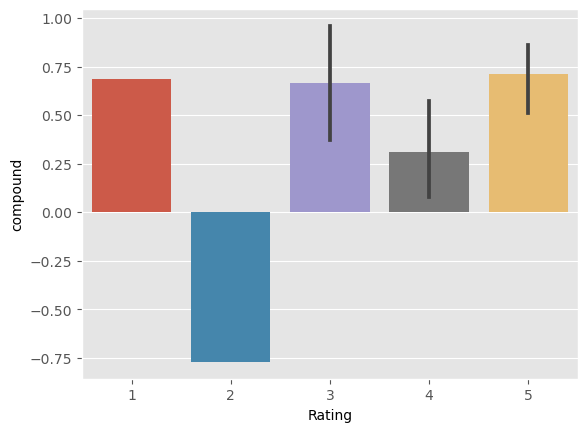

In [80]:
# plot vader results
sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score by Amazon Rating Review')
plt.show()

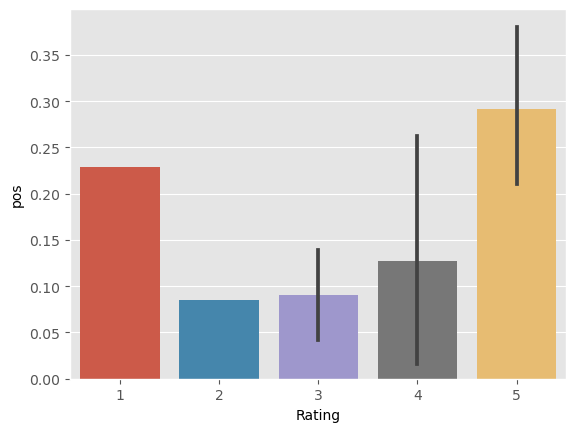

In [83]:
sns.barplot(data=vaders, x ='Rating', y='pos')
ax.set_title('Positive Score by Amazon Rating Review')
plt.show()

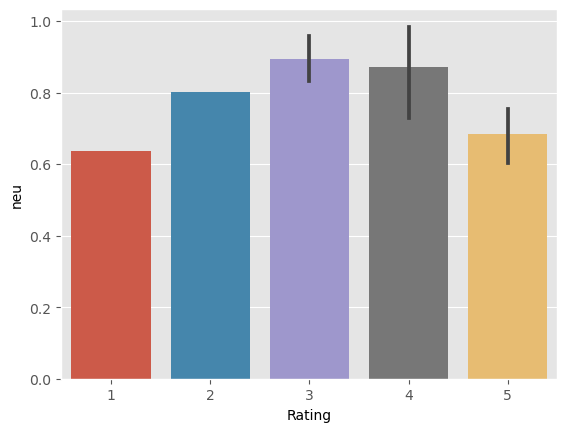

In [84]:
sns.barplot(data=vaders, x ='Rating', y='neu')
ax.set_title('Netural Score by Amazon Rating Review')
plt.show()

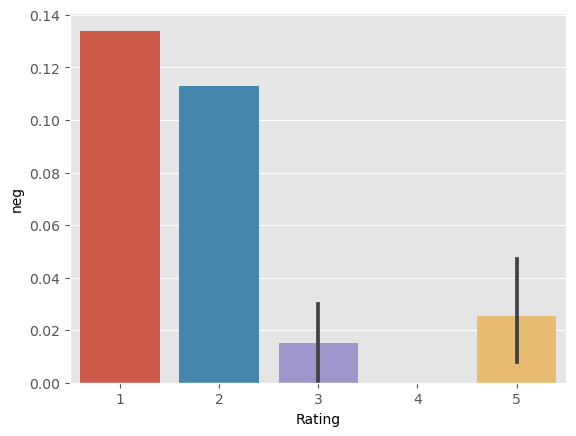

In [85]:
sns.barplot(data=vaders, x ='Rating', y='neg')
ax.set_title('Negative Score by Amazon Rating Review')
plt.show()

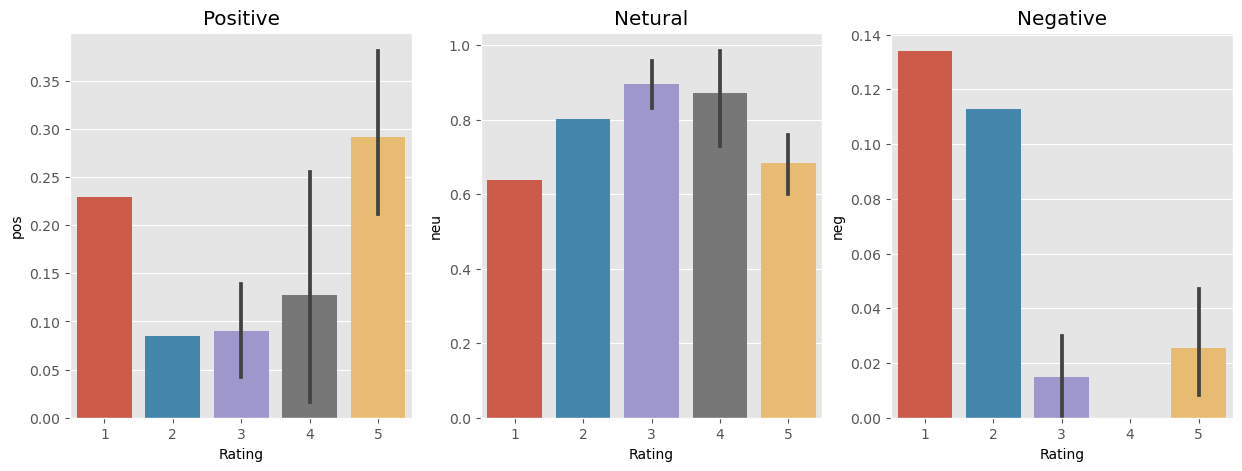

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=vaders, x ='Rating', y='pos',ax=axs[0])
sns.barplot(data=vaders, x ='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x ='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Netural')
axs[2].set_title('Negative')
plt.show()

In [92]:
# Robert Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [93]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\NITU PANDEL\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\NITU PANDEL\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [94]:
#vader results on example
print(example)
sia.polarity_scores(example)


It’s a great laptop, fast and easy to use. A lot of storage space and the graphics are pretty good for a standard laptop. However; if you’re buying for gaming purposes, note that most online games will not work and if they do, you’ll more than likely experience heavy glitchy.


{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.9201}

In [97]:
#Run for Robert Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2],
}
print(scores_dict)

{'roberta_neg': 0.12201861, 'roberta_neu': 0.23338921, 'roberta_pos': 0.64459217}


In [98]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [106]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        
    text = row['Review']
    myid = i  # Use the index as the identifier
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    break;    

  0%|          | 0/30 [00:00<?, ?it/s]

In [107]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.758,
 'vader_pos': 0.242,
 'vader_compound': 0.936,
 'roberta_neg': 0.0044413083,
 'roberta_neu': 0.022699893,
 'roberta_pos': 0.9728588}

In [108]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for index {i}')

  0%|          | 0/30 [00:00<?, ?it/s]

In [112]:
res

{0: {'vader_neg': 0.0,
  'vader_neu': 0.758,
  'vader_pos': 0.242,
  'vader_compound': 0.936,
  'roberta_neg': 0.0044413083,
  'roberta_neu': 0.022699893,
  'roberta_pos': 0.9728588},
 1: {'vader_neg': 0.0,
  'vader_neu': 0.196,
  'vader_pos': 0.804,
  'vader_compound': 0.6249,
  'roberta_neg': 0.0067282775,
  'roberta_neu': 0.062391043,
  'roberta_pos': 0.93088067},
 2: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.17320983,
  'roberta_neu': 0.7863955,
  'roberta_pos': 0.040394712},
 3: {'vader_neg': 0.082,
  'vader_neu': 0.71,
  'vader_pos': 0.208,
  'vader_compound': 0.9814,
  'roberta_neg': 0.0275013,
  'roberta_neu': 0.07595872,
  'roberta_pos': 0.89654},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.15868726,
  'roberta_neu': 0.69409376,
  'roberta_pos': 0.14721902},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.766,
  'vader_pos': 0.234,
  'vader_compound': 0.9201,
  '

In [115]:
results_df = pd.DataFrame(res).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Id'}, inplace=True)
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)

In [116]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Product Name,Review,Rating
0,0,0.000,0.758,0.242,0.9360,0.004441,0.022700,0.972859,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",The laptop's screen is huge and great picture ...,5
1,1,0.000,0.196,0.804,0.6249,0.006728,0.062391,0.930881,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",Great product,5
2,2,0.000,1.000,0.000,0.0000,0.173210,0.786395,0.040395,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",See review title.,4
3,3,0.082,0.710,0.208,0.9814,0.027501,0.075959,0.896540,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",The laptop works great so far. It wasn't easy ...,5
4,4,0.000,1.000,0.000,0.0000,0.158687,0.694094,0.147219,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Si me sgradoy,4


In [117]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Product Name', 'Review',
       'Rating'],
      dtype='object')

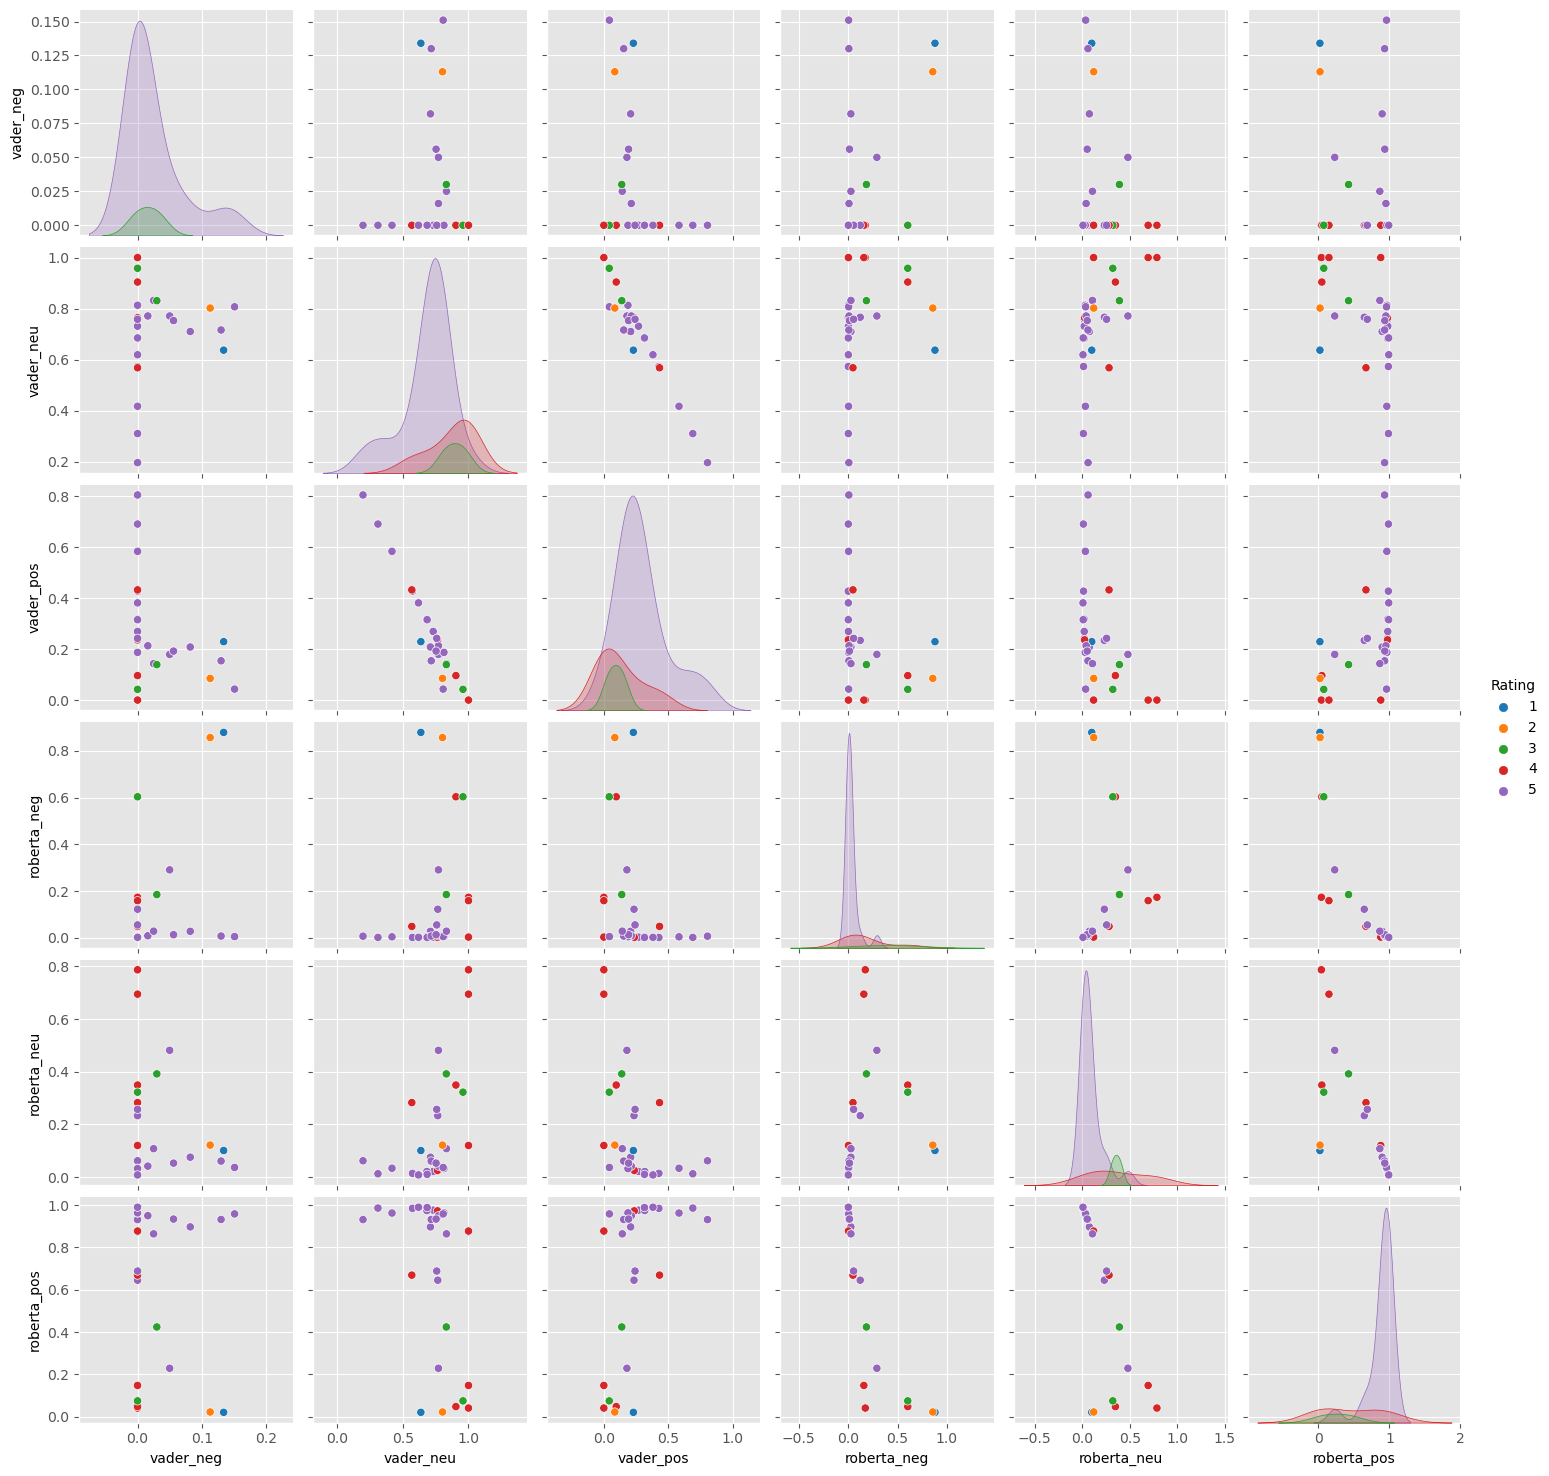

In [118]:
# Compare Scores between models
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [119]:
results_df.query('Rating == 1').sort_values('roberta_pos', ascending=False)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Product Name,Review,Rating
9,9,0.134,0.637,0.229,0.6883,0.878626,0.101214,0.02016,"HP Newest Pavilion 15.6"" HD Laptop, Intel Quad...",Sure would be nice if the whole thing worked. ...,1


In [ ]:
#Positive 1 Star Reviews

In [121]:
results_df.query('Rating == 1').sort_values('roberta_pos', ascending=False)['Review'].values[0]

'Sure would be nice if the whole thing worked. Had it a couple weeks only to find out neither USB ports work. Spent 5 hours with tech support and 3 different techs and no luck. Trying to return through Amazon and having trouble with that too!!!!!!! Very unhappy customer!'

In [122]:
results_df.query('Rating == 1').sort_values('vader_pos', ascending=False)['Review'].values[0]

'Sure would be nice if the whole thing worked. Had it a couple weeks only to find out neither USB ports work. Spent 5 hours with tech support and 3 different techs and no luck. Trying to return through Amazon and having trouble with that too!!!!!!! Very unhappy customer!'

In [ ]:
# Negative Sentiment 5- star Reviews

In [123]:
results_df.query('Rating == 5').sort_values('roberta_neg', ascending=False)['Review'].values[0]

'Its an ok laptop but dont expect to do any gaming at all, mainly just for school work on top of that its still a tad slow for my taste. With a fresh OS theres no reason why i should have keyboard lag and applications taking a bit to load, id rather save 100-200 more and get yourself something with better CPU, most laptops you will find with a price range of 100-200 more will probably not give you 16gb of ram or 1tb ssd, but the sacrifice will be worth the better cpu, plus you can always add more ram to the laptop later.'

In [125]:
results_df.query('Rating == 5').sort_values('vader_neg', ascending=False)['Review'].values[0]

"I really have no complaints about this laptop.. it's fast, light weight, and has plenty of memory.. the battery life doesn't really matter to me because I keep my laptop at home.. overall though it worth it, and affordable being under $600"

In [126]:
# The Transformer Pipeline
from transformers import pipeline


In [128]:
sentiment_pipeline = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [130]:
sentiment_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [131]:
sentiment_pipeline('Like and comment')

[{'label': 'POSITIVE', 'score': 0.9928141236305237}]

In [133]:
sentiment_pipeline('He is bad')

[{'label': 'NEGATIVE', 'score': 0.9997968077659607}]